**Ques(1.)**


The faces of a thin square plate of length 24cm are perfectly insulated (to avoid any atmospherical effects). Assume that the side at y = 24 is kept at 20 degree celcius and all the other three sides are kept at zero degree celcius.


The exact solution of the problem is
$$
⇒ u(x, y) = \frac{80}{Π}  \sum_{n=1}^{\infty} \frac{sin \frac{(2n - 1)πx}{24} sinh \frac{(2n - 1)πy}{24}}{(2n − 1)π . sinh (2n − 1)π }
$$



 (a.) Discretize the PDE using second order central difference approximations and solve the resultant
algebraic equations using Jacobi, Gauss- seidel and SOR methods. (Choose the number of grid
points in x and y directions as variables and should be fixed during the execution of the code).


(b) Compare your numerical solutions with the given exact solution and compute the absolute error
for every case.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# exact solution...................................................
def exact_solution(x, y):
    u = 0
    for n in range(1, 100):
        u += (80 / np.pi) * (np.sin((2 * n - 1) * np.pi * x / 24) * np.sinh((2 * n - 1) * np.pi * y / 24)) / ((2 * n - 1) * np.pi * np.sinh((2 * n - 1) * np.pi))
    return u

# Gauss--Jacobi method.................................................
def jacobi_(u, del_x, del_y, iter=50, toler=1e-5):
    nx, ny = u.shape
    u_new = u[:]
    for it in range(iter):
        error = 0.0
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u_new[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])
                error = max(error, abs(u_new[i, j] - u[i, j]))
        u = np.copy(u_new)
        if error < toler:
            break
    return u

# Gauss--Seidel method..............................................
def gauss_seidel_(u_, del_x, del_y, iter= 50, toler=1e-5):
    nx, ny = u_.shape
    for ite in range(iter):
        error = 0.0
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u_[i, j] = 0.25 * (u_[i-1, j] + u_[i+1, j] + u_[i, j-1] + u_[i, j+1])
                error = max(error, abs(u[i, j] - u[i, j]))
        if error < toler:
            break
    return u_

#  SOR method..........................................................
def sor_method(u, del_x, del_y, omega, iter=50, toler=1e-5):
    nx, ny = u.shape
    for _ in range(iter):
        error = 0.0
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u_old = u[i, j]
                u[i, j] = (1 - omega) * u[i, j] + omega * 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])
                error = max(error, abs(u[i, j] - u_old))
        if error < toler:
            break
    return u




In [2]:
# Maximum absolute error...............................
def compute_absolute_error(u_numerical, u_exact):
    error = np.abs(u_numerical - u_exact)
    max_error = np.max(error)
    return max_error

# Parameters...................................

# Length of plate..............................
L = 24

#grid points....................................
Nx = 51
Ny = 51
del_x = L / (Nx - 1)
del_y = L / (Ny - 1)
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

# boundary conditions....................................
u = np.zeros((Nx, Ny))
u[-1, :] = 20
u[:, 0] = u[:, -1] = 0

# exact solution........................................
u_exact = exact_solution(X, Y)

# using Jacobi method...................................
u_jacobi = jacobi_(u.copy(), del_x, del_y)
#print(u_jacobi)

# using Gauss-Seidel method..............................
u_gauss_seidel = gauss_seidel_(u.copy(), del_x, del_y)
#print(u_gauss_seidel)

# using SOR method.......................................
omega = 1.5
u_sor = sor_method(u.copy(), del_x, del_y, omega)
#print(u_sor)

# absolute errors for all the methods......................
error_jacobi = compute_absolute_error(u_jacobi, u_exact)
print("Absolute error (Jacobi method):", error_jacobi)

error_gauss_seidel = compute_absolute_error(u_gauss_seidel, u_exact)
print("Absolute error (Gauss-Seidel method):", error_gauss_seidel)

error_sor = compute_absolute_error(u_sor, u_exact)
print("Absolute error (SOR method):", error_sor)

Absolute error (Jacobi method): 13.950153046331199
Absolute error (Gauss-Seidel method): 13.950153046331199
Absolute error (SOR method): 13.950153046331199


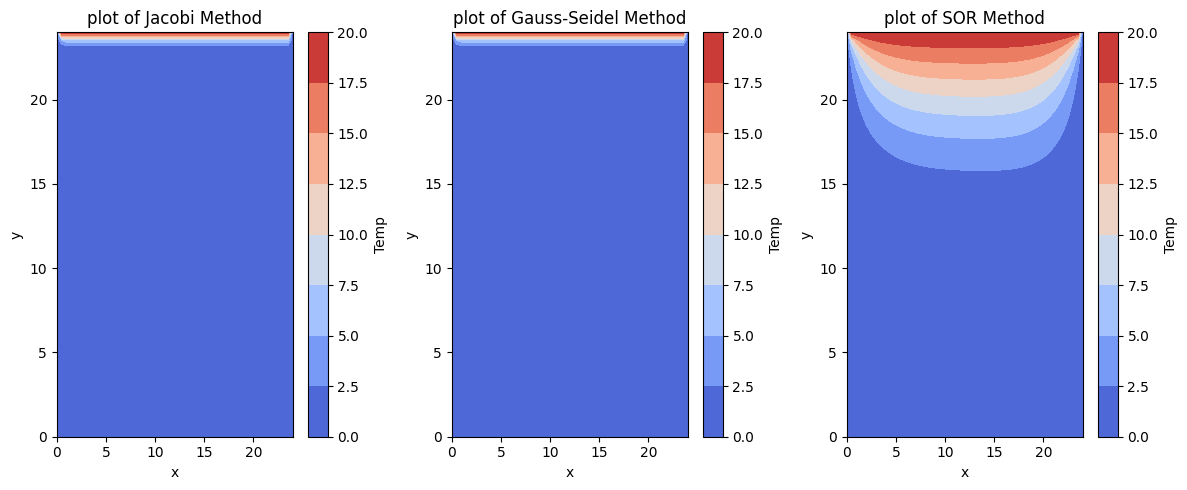

In [3]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title('plot of Jacobi Method')
plt.contourf(X, Y, u_jacobi, cmap='coolwarm')
plt.colorbar(label='Temp')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.title('plot of Gauss-Seidel Method')
plt.contourf(X, Y, u_gauss_seidel, cmap='coolwarm')
plt.colorbar(label='Temp')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.title('plot of SOR Method')
plt.contourf(X, Y, u_sor, cmap='coolwarm')
plt.colorbar(label='Temp')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()